In [1]:
#Installing packages and loading them into the enviroment
install.packages("MASS")
library("MASS")
install.packages("missMDA")
library("missMDA")
install.packages("tidyverse")
library("tidyverse")
install.packages("caret")
library("caret")
install.packages("mice")
library("mice")

Installing package into 'C:/Users/daeda/OneDrive/Documents/R/win-library/3.6'
(as 'lib' is unspecified)



package 'MASS' successfully unpacked and MD5 sums checked


Warning message:
"cannot remove prior installation of package 'MASS'"
Warning message in file.copy(savedcopy, lib, recursive = TRUE):
"problem copying C:\Users\daeda\OneDrive\Documents\R\win-library\3.6\00LOCK\MASS\libs\x64\MASS.dll to C:\Users\daeda\OneDrive\Documents\R\win-library\3.6\MASS\libs\x64\MASS.dll: Permission denied"
Warning message:
"restored 'MASS'"



The downloaded binary packages are in
	C:\Users\daeda\AppData\Local\Temp\RtmpCYfxeC\downloaded_packages


Installing package into 'C:/Users/daeda/OneDrive/Documents/R/win-library/3.6'
(as 'lib' is unspecified)



package 'missMDA' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\daeda\AppData\Local\Temp\RtmpCYfxeC\downloaded_packages


Installing package into 'C:/Users/daeda/OneDrive/Documents/R/win-library/3.6'
(as 'lib' is unspecified)



package 'tidyverse' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\daeda\AppData\Local\Temp\RtmpCYfxeC\downloaded_packages


-- Attaching packages --------------------------------------- tidyverse 1.3.0 --

v ggplot2 3.3.0            v purrr   0.3.3       
v tibble  2.99.99.9014     v dplyr   0.8.99.9000 
v tidyr   1.0.2            v stringr 1.4.0       
v readr   1.3.1            v forcats 0.4.0       

-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()
x dplyr::select() masks MASS::select()

Installing package into 'C:/Users/daeda/OneDrive/Documents/R/win-library/3.6'
(as 'lib' is unspecified)



package 'caret' successfully unpacked and MD5 sums checked


Warning message:
"cannot remove prior installation of package 'caret'"
Warning message in file.copy(savedcopy, lib, recursive = TRUE):
"problem copying C:\Users\daeda\OneDrive\Documents\R\win-library\3.6\00LOCK\caret\libs\x64\caret.dll to C:\Users\daeda\OneDrive\Documents\R\win-library\3.6\caret\libs\x64\caret.dll: Permission denied"
Warning message:
"restored 'caret'"



The downloaded binary packages are in
	C:\Users\daeda\AppData\Local\Temp\RtmpCYfxeC\downloaded_packages


Loading required package: lattice


Attaching package: 'caret'


The following object is masked from 'package:purrr':

    lift


Installing package into 'C:/Users/daeda/OneDrive/Documents/R/win-library/3.6'
(as 'lib' is unspecified)



package 'mice' successfully unpacked and MD5 sums checked


Warning message:
"cannot remove prior installation of package 'mice'"
Warning message in file.copy(savedcopy, lib, recursive = TRUE):
"problem copying C:\Users\daeda\OneDrive\Documents\R\win-library\3.6\00LOCK\mice\libs\x64\mice.dll to C:\Users\daeda\OneDrive\Documents\R\win-library\3.6\mice\libs\x64\mice.dll: Permission denied"
Warning message:
"restored 'mice'"



The downloaded binary packages are in
	C:\Users\daeda\AppData\Local\Temp\RtmpCYfxeC\downloaded_packages



Attaching package: 'mice'


The following object is masked from 'package:tidyr':

    complete


The following objects are masked from 'package:base':

    cbind, rbind




In [2]:
#Loading all needed files,dropping first two coloumns, which are not needed for analysis (ID, species)
ionomics <- read.csv('spec_shoot_xyz_trainingB.csv', colClasses =c("NULL","NULL",NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,
                                                                    NA,NA,NA,NA,NA,NA,NA))
#Imputation via missMDA
imputeIonomics <- imputePCA(ionomics, method = "Regularized")

In [3]:
#Imputation via Mice
# TODO add in fit graphics and missing data quantification
temp <- mice(ionomics, m = 1, maxit = 5, method = "norm.boot", seed = 567)
ionomics <- complete(temp,1)


 iter imp variable
  1   1  S34  As75
  2   1  S34  As75
  3   1  S34  As75
  4   1  S34  As75
  5   1  S34  As75


In [4]:
# Split the data into training (80%) and test set (20%)
#data set imputed via mice
set.seed(123)
training.samples <- ionomics[,2] %>%
  createDataPartition(p = 0.8, list = FALSE)
train.data <- ionomics[training.samples, ]
test.data <- ionomics[-training.samples, ]

#data set imputed via missMDA
training.samples.impute <- imputeIonomics$completeObs[,2] %>%
  createDataPartition(p = 0.8, list = FALSE)
train.data.impute <- imputeIonomics$completeObs[training.samples.impute, ]
test.data.impute <- imputeIonomics$completeObs[-training.samples.impute, ]
#typecasting from matrix to dataframe
train.data.impute <- unlist(train.data.impute)
test.data.impute <- unlist(test.data.impute)
train.data.impute <- as.data.frame(train.data.impute)
test.data.impute <- as.data.frame(test.data.impute)

In [6]:
# Fit the model
#data set imputed with mice
model <- lda(spec_as_int~., data = train.data)
# Make predictions
predictions <- model %>% predict(test.data)
# Model accuracy
mean(predictions$class==test.data$spec_as_int)
#model

#data set imputed with missMDA
model.impute <- lda(spec_as_int~., data = train.data.impute)
# Make predictions
predictions.impute <- model.impute %>% predict(test.data.impute)
# Model accuracy
mean(predictions.impute$class == test.data.impute$spec_as_int)
#model.impute
#TODO format data generated by model

[1] 0.6696429

[1] 0.6428571

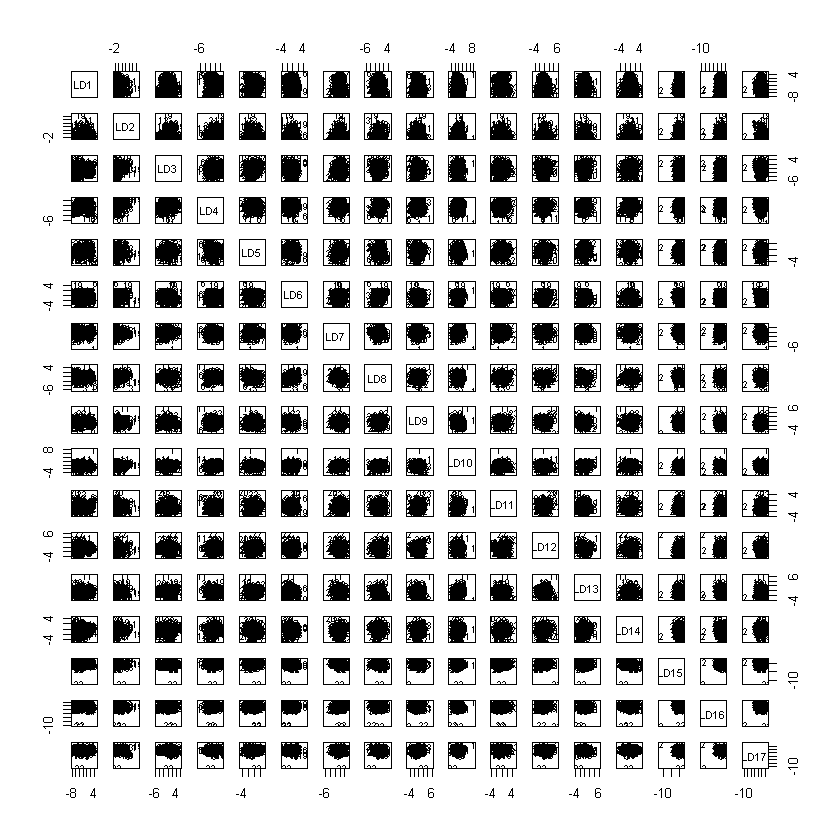

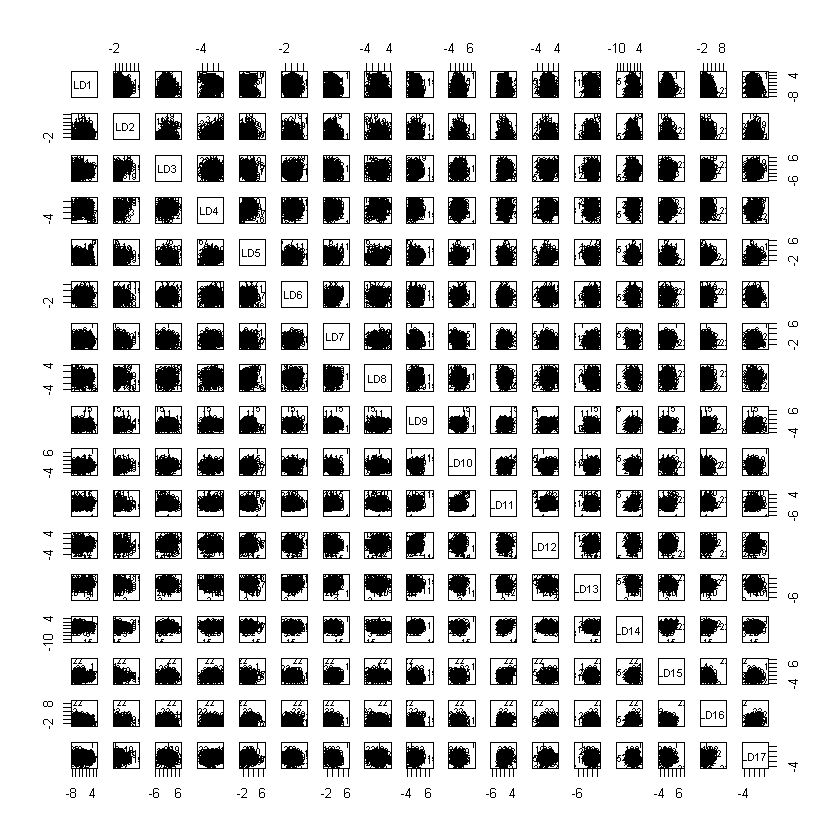

In [7]:
plot(model)
plot(model.impute)
#TODO a better way to do this 

In [9]:
# Predicted classes
head(predictions$class, 6)
# Predicted probabilities of class memebership.
head(predictions$posterior, 6) 
# Linear discriminants
head(predictions$x, 3) 

[1] 6 6 6 6 6 3
Levels: 1 3 4 6 7 8 9 11 12 14 15 16 17 19 20 22 23 24

,1,3,4,6,7,8,9,11,12,14,15,16,17,19,20,22,23,24
1,2.562822e-02,3.050500e-09,4.747224e-06,0.8446989165,1.296565e-01,3.348412e-07,8.384194e-06,1.785289e-11,8.058032e-10,2.791463e-06,1.350562e-07,1.604400e-09,6.909928e-18,4.941183e-25,2.384829e-25,2.342333e-15,2.846025e-14,6.298523e-16
2,1.193350e-02,3.616267e-06,6.120838e-02,0.7125528992,1.709338e-01,3.409929e-02,5.374153e-03,5.827315e-08,2.612052e-04,2.735141e-03,6.370709e-04,2.609142e-04,7.719255e-12,6.241992e-20,2.544256e-18,5.591472e-11,1.644953e-09,7.538626e-10
3,9.129611e-05,1.439177e-07,5.672299e-03,0.5393136700,4.542381e-01,5.190860e-06,1.199236e-05,8.084012e-06,1.967491e-05,3.591499e-04,2.749565e-04,5.421243e-06,9.658140e-16,1.621676e-18,2.079879e-19,6.924373e-12,1.308132e-10,1.632435e-11
4,7.234730e-02,6.344880e-07,1.262214e-03,0.6047742937,3.193306e-01,4.159598e-04,7.900995e-04,1.660574e-07,1.122183e-05,8.321053e-04,2.303039e-04,5.123671e-06,1.697264e-14,1.369252e-19,1.245831e-19,1.351627e-12,6.490730e-11,4.448220e-11
8,7.429533e-02,3.693334e-09,5.095379e-04,0.8141166368,1.106364e-01,3.349948e-05,1.177828e-04,1.965767e-10,1.632461e-06,2.823302e-04,6.483457e-06,4.015251e-07,7.274493e-17,1.515061e-24,2.563560e-22,1.349004e-13,6.232277e-13,1.300245e-13
16,8.250936e-07,9.466097e-01,1.637082e-02,0.0002198699,1.344396e-05,3.678488e-02,7.606167e-08,1.299010e-07,7.940620e-08,1.171912e-08,1.422539e-08,1.271313e-07,1.464595e-09,1.814939e-15,2.034581e-17,1.376050e-11,1.851120e-10,1.408880e-10


,LD1,LD2,LD3,LD4,LD5,LD6,LD7,LD8,LD9,LD10,LD11,LD12,LD13,LD14,LD15,LD16,LD17
1,4.686481,-1.17752922,1.7438868,-2.2156236,-2.428611,2.2978870,1.5084330,-1.4741329,-0.5730762,-1.7750241,2.0281627,0.64775103,0.2155134,0.3109771,-0.2990766,-0.4003967,0.18449294
2,3.419192,-0.95315305,0.1480328,-1.1555228,0.657484,0.8824885,-0.3370814,-0.2810920,0.5496740,-0.8242746,0.7559235,-0.29204075,-0.1136716,0.9945369,-1.0205258,-0.2686381,-1.46922890
3,3.468931,-0.08103361,0.4482485,-0.6838543,-2.541336,-0.2566212,1.8787698,0.3126143,0.8268332,0.5821338,-0.4468955,-0.03546636,0.4824412,-0.4152906,-0.4031922,0.3609406,-0.07568488


|species|spec_as_int|
|---|---|
|acerifolia_x|1|
|aestivalis_x|2|
|cinerea_x|3|
|labrusca_x|4|
|palmata_x|5|
|riparia_x|6|
|rupestris_x|7|
|vulpina_x|8|
|acerifolia_y|9|
|aestivalis_y|10|
|cinerea_y|11|
|labrusca_y|12|
|palmata_y|13|
|riparia_y|14|
|rupestris_y|15|
|vulpina_y|16|
acerifolia_z|17|
|aestivalis_z|18|
|cinerea_z|19|
|labrusca_z|20|
|palmata_z|21|
|riparia_z|22|
|rupestris_z|23|
|vulpina_z|24|

In [11]:
table <- table(Predicted=predictions$class, Species=test.data$spec_as_int)
confusionMatrix(table)

Confusion Matrix and Statistics

         Species
Predicted  1  3  4  6  7  8  9 11 12 14 15 16 17 19 20 22 23 24
       1   0  0  0  1  1  0  0  0  0  0  1  0  0  0  0  0  0  0
       3   0  5  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
       4   0  0  3  1  1  0  0  0  0  0  0  0  0  0  0  0  0  0
       6   5  0  0 12  0  0  0  0  0  0  0  0  0  0  0  0  0  0
       7   0  0  1  0  2  0  0  0  0  0  0  0  0  0  0  0  0  0
       8   0  0  0  1  0  2  0  0  0  0  0  0  0  0  0  0  0  0
       9   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
       11  0  0  0  0  0  1  0  6  0  0  0  0  0  1  0  0  0  0
       12  0  0  1  0  0  0  0  0  3  1  0  1  0  0  0  0  0  0
       14  0  0  0  1  0  0  2  0  0 10  2  0  0  0  0  0  0  0
       15  0  0  0  0  0  0  0  0  0  0  3  1  0  0  0  0  0  0
       16  0  1  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  1
       17  0  0  0  0  0  0  0  0  0  0  0  0  1  0  2  1  0  0
       19  0  0  0  0  0  0  0  0  0  0  0  0  0  5  0